## 1. 라이브러리 임포트

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style = 'ticks')

# 형태소 분석기 임포트
from konlpy.tag import Okt ; t = Okt()
import pickle

# 그래프 한글 표기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

# word2vec 시각화
from sklearn.manifold import TSNE
import matplotlib as mpl
import gensim 
import gensim.models as g

# wordcloud
import re
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud

## 2. 데이터 불러오기

In [5]:
# read_csv
df = pd.read_csv('./bluehouse_ver3.csv', parse_dates = ['start', 'end'])

# ★ 카테고리별로 불러오기
right = df[df['category'] == '인권/성평등']
right.drop(['Unnamed: 0'], axis='columns', inplace=True)
right.head()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,article_id,start,end,votes,category,title,content
101,830,2017-08-29,2017-09-13,1482,인권/성평등,채용형 시간선택제 공무원의 공무원연금 가입을 청원합니다.,채용형 시간선택제 공무원의 공무원연금 가입을 청원합니다.\n채용형 시간선택제 공무원...
109,928,2017-08-30,2017-09-14,106,인권/성평등,남성전용임대주택도 도입해주세요.,안녕하세요.\n서울에 거주하고 있는 30살 남자입니다.\n다름이아니라 뉴스에서 보다...
120,1170,2017-08-31,2017-11-29,34750,인권/성평등,여자 집값 70% 지원정책 폐지,현재 진행중인 1인가구 여성 임대주택 70%지원 정책 폐지를 요청합니다.\n국가가 ...
127,1401,2017-09-02,2017-10-02,1812,인권/성평등,여성가족부를 폐지하고 양성평등위원회를 설치해주세요,보셨겠지만 베스트청원에 여성징병 관련청원이 올라올 정도로 역차별에 대해 불만을 느끼...
129,1441,2017-09-02,2017-10-02,3981,인권/성평등,농촌.처녀들에게도. 국제결혼.500만원. 지급하라.,"요즘 농촌 총각덜은... 결혼하믄 500만원 받아간담시롱? 거 결혼이 머 대수라고,..."


## 3. Word2Vec
#### 3-1. Word2Vec 빈도 확인

In [6]:
# 제목, 내용 리스트 하나로
contents = []
for i in range(len(right)) :
    contents.append(right.iloc[i, 5])

# Okt로 tokenize
token_right = t.nouns(str(contents))

# stopwords!!!!!!!!!!!!!!!!!!
stopwords=['및','지금','담당','속','내년','생','초','시기','비중','조정','날',
           '로','회','하라','료','저희','청원','집','년','원','절','달','병',
           '무비','함','맨','태','뜻','부탁','땅','개월','합','배','령','최',
           '예','염','한시','계','폐','개','겁','언제','피','너','절대','업',
           '직접','반드시','퇴','일','무','세비','사하라','누구','역','권','현',
           '킹','불','즉시','왜','때','손','외','만','힘','비소','금','용','증',
           '종','환','돈','안','경','주','검','제대로','못','난','급','이상','곳',
           '제안','여러분','이유','기','타','추가','번','실','고로','당장','제외',
           '다시','과','이하','대한','지대','위해','당한','포함','알고싶다','김',
           '대판','몰래','은혜','그것','메','맘','살','단','말','사용','구','군',
           '물','엄중','세','대해','사실','설치','또한','기재','국','알','약',
           '비','간','은', '관련', '재','정도','사적','개원','일부','무조건','정',
           '모두','통한','은','칸', '각종','위', '의','두', '양','직', '거','부',
           '제', '수', '시오', '등', '범', '고', '내', '관', '것', '를', '이', 
           '명', '저', '더', '방', '건', '남', '꼭', '좀', '중', '일어나지', '사',
           '처', '후', '자', '씨', '차', '시', '처', '입', '그', '전', '해', '왜',
           '글','제발','매일','요구','티']
no_stops = [word for word in token_right if not word in stopwords]

import nltk
right_counts = nltk.Text(no_stops)
right_counts.vocab().most_common(100) # 인권/성평등 카테고리 빈도 높은 상위 30개 출력

[('처벌', 563),
 ('사건', 403),
 ('폐지', 177),
 ('수사', 171),
 ('폭행', 169),
 ('조사', 158),
 ('요청', 132),
 ('법', 114),
 ('여성', 110),
 ('가해자', 105),
 ('피해자', 103),
 ('성폭행', 103),
 ('촉구', 95),
 ('인권', 93),
 ('성추행', 91),
 ('경찰', 90),
 ('반대', 87),
 ('대한항공', 87),
 ('국민', 84),
 ('강화', 76),
 ('성폭력', 73),
 ('성범죄', 71),
 ('자살', 70),
 ('살인', 67),
 ('대통령', 67),
 ('보호', 66),
 ('강력', 65),
 ('검사', 63),
 ('장자연', 62),
 ('남성', 59),
 ('폭력', 59),
 ('워마드', 59),
 ('자매', 58),
 ('여성가족부', 55),
 ('대한민국', 55),
 ('범죄', 51),
 ('금지', 50),
 ('엄벌', 50),
 ('조현민', 48),
 ('광주', 48),
 ('청소년', 47),
 ('고발', 47),
 ('불법', 46),
 ('구속', 46),
 ('강제', 45),
 ('회장', 45),
 ('개정', 44),
 ('개선', 42),
 ('방용훈', 42),
 ('집단', 41),
 ('사람', 40),
 ('인천', 40),
 ('무고죄', 39),
 ('공무원', 38),
 ('학생', 38),
 ('사이트', 38),
 ('장애인', 38),
 ('진상', 38),
 ('단역배우', 38),
 ('조선일보', 37),
 ('학교', 36),
 ('국가', 36),
 ('교사', 36),
 ('피해', 36),
 ('한국', 36),
 ('파면', 35),
 ('몰카', 35),
 ('일가', 35),
 ('사망', 34),
 ('검찰', 34),
 ('판사', 33),
 ('성매매', 33),
 ('진실', 33),
 ('제도', 32),

#### 3-2. Word2Vec 모델링

In [8]:
from gensim.models import Word2Vec
embedding_model = Word2Vec([no_stops], size = 100, window = 3, min_count = 3, workers = 4, iter = 100)
aaa = embedding_model.most_similar(['노동자'], topn = 20) ; aaa  # 상위 20개 도출

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


[('고용', 0.8227435946464539),
 ('노조', 0.8110793232917786),
 ('인권위', 0.7996171712875366),
 ('특수', 0.7620306015014648),
 ('노동조합', 0.7552649974822998),
 ('기업', 0.7206683158874512),
 ('악덕', 0.7052377462387085),
 ('처우', 0.7043750882148743),
 ('인천공항', 0.6942954063415527),
 ('특례', 0.6867127418518066),
 ('횡포', 0.6763559579849243),
 ('제보자', 0.6706420183181763),
 ('소송', 0.6537002325057983),
 ('보장', 0.6496628522872925),
 ('협력', 0.647789716720581),
 ('명칭', 0.6395488977432251),
 ('소수자', 0.6394482851028442),
 ('공익', 0.6388207674026489),
 ('권리', 0.6373193264007568),
 ('언어', 0.6370149850845337)]

#### 3-3. Word2Vec 시각화

In [87]:
from plotnine import *

def tsne_plot(model):
    labels = []
    tokens = []
    count = []
    C = np.random.randint(0,150,150)
    right_counts = nltk.Text(token_right)
    right_counts.vocab()

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        count.append(right_counts.vocab()[word]*70)
        
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens[:150])  # 150개만 그림에 표시
    
    df_1 = pd.DataFrame(new_values, index=labels[:150], columns=['x', 'y'])
    
    fig = plt.figure()
    fig.set_size_inches(25, 20)

    ax = fig.add_subplot(1, 1, 1)
    ax.axis('off')

    ax.scatter(df_1['x'], df_1['y'], marker = 'o',alpha=0.3, s= count ,
               c=C, cmap = 'Greys')

    for word, pos in df_1.iterrows():
        ax.annotate(word, pos, size=30, color = 'black',alpha = 0.7)
    plt.show()
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':


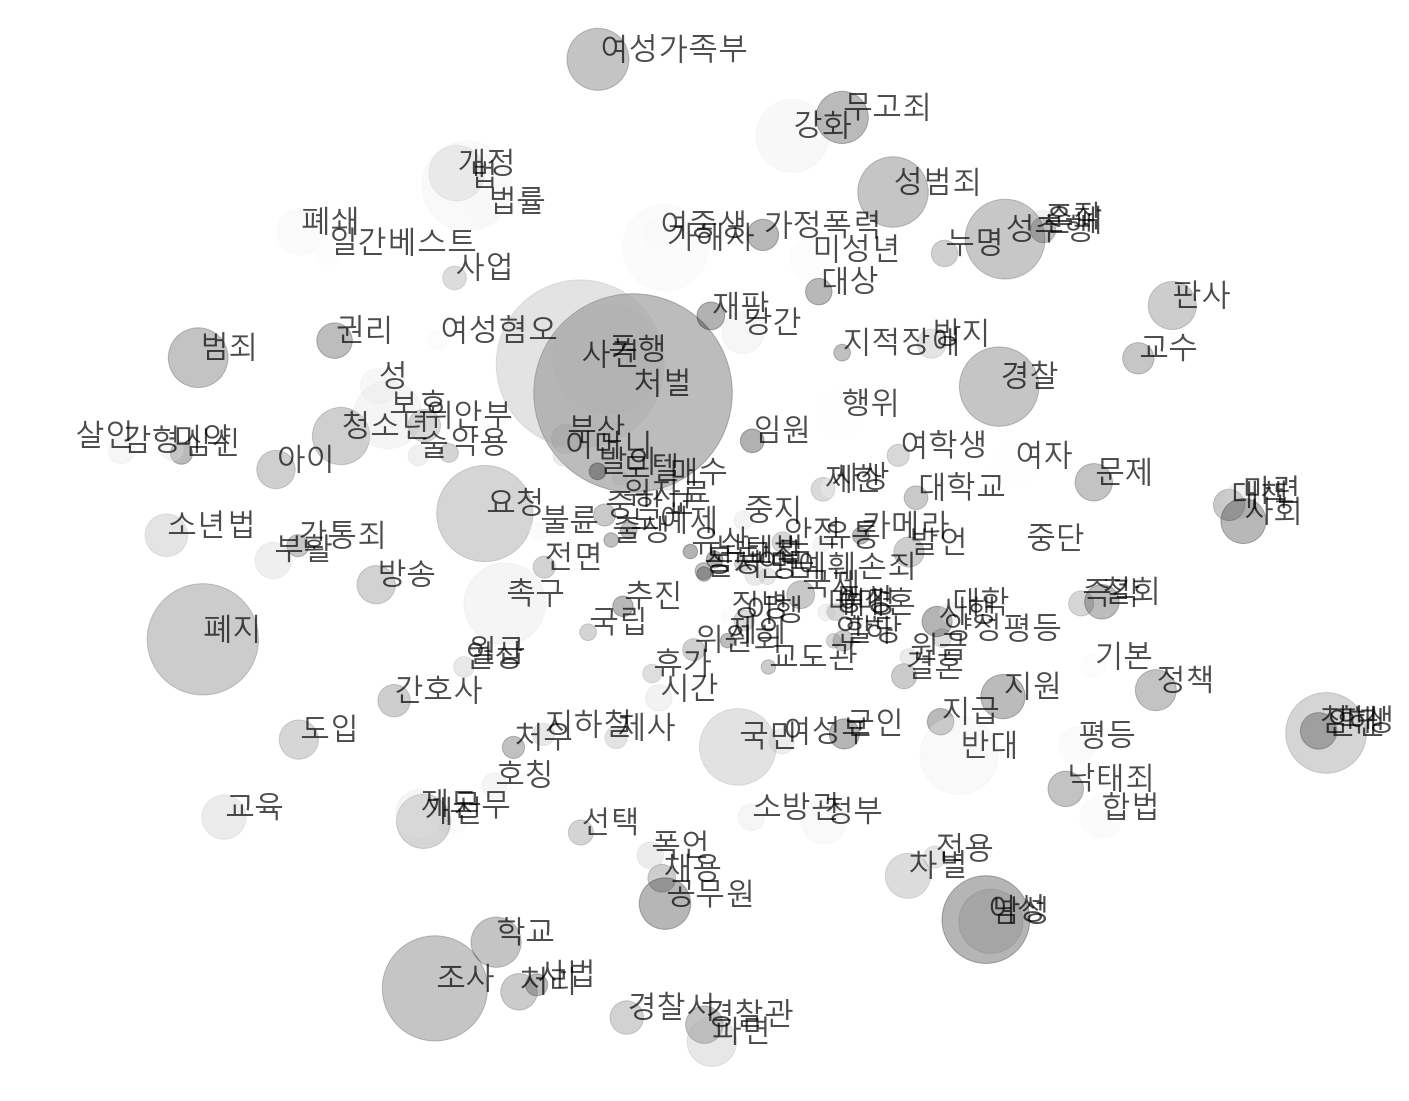

In [88]:
tsne_plot(embedding_model)

# 워드 클라우드

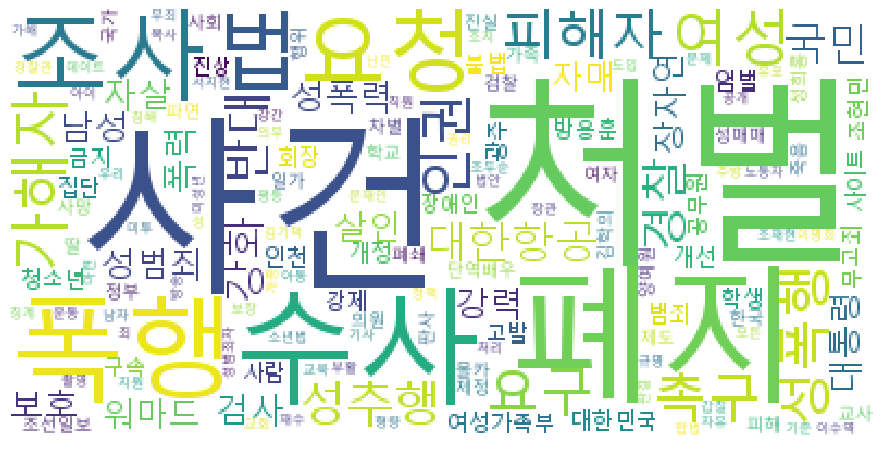

In [84]:
data=right_counts.vocab().most_common(200)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2, max_words = 150, background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# 형태소 분석기 
from konlpy.tag import Okt ; okt = Okt()
from nltk.corpus import stopwords

import gensim 
import gensim.models as g

# read_csv
df = pd.read_csv('./bluehouse_ver3.csv', parse_dates = ['start', 'end'])
right = df[df['category'] == '인권/성평등']
right.drop(['Unnamed: 0'], axis='columns', inplace=True)
right.head()

# 제목을 리스트 하나로 만들기
contents = []
for i in range(len(right)) :
    contents.append(right.iloc[i, 5])
    
# Okt로 명사만 추출
token_right = okt.nouns(str(contents))

# stopwords로 불필요한 단어 제거
stopwords=['및','지금','담당','속','내년','생','초','시기','비중','조정','날','로','회','하라','료',
           '저희','청원','집','년','원','절','달','병','무비','함','맨','태','뜻','부탁','땅','개월',
           '합','배','령','최','예','염','한시','계','폐','개','겁','언제','피','너','절대','업',
           '직접','반드시','퇴','일','무','세비','사하라','누구','역','권','현','킹','불','즉시','왜',
           '때','손','외','만','힘','비소','금','용','증','종','환','돈','안','경','주','검','제대로',
           '못','난','급','이상','곳','제안','여러분','이유','기','타','추가','번','실','고로','당장',
           '제외','다시','과','이하','대한','지대','위해','당한','포함','알고싶다','김','대판','몰래',
           '은혜','그것','메','맘','살','단','말','사용','구','군','물','엄중','세','대해','사실','설치',
           '또한','기재','국','알','약','비','간','은', '관련', '재','정도','사적','개원','일부','무조건',
           '정','모두','통한','은','칸', '각종','위', '의','두','양','직','거','부','제', '수','시오',
           '등','범','고','내','관','것','를','이','명','저','더','방','건','남','꼭','좀','중','일어나지',
           '사','처','후','자','씨','차','시','처','입','그','전','해','왜','글','제발','매일','요구','티']
no_stops = [word for word in token_right if not word in stopwords]

# 노동자 키원드로 유사도 높은 단어  추출하기
from gensim.models import Word2Vec
embedding_model = Word2Vec([no_stops], size = 100, window = 3, min_count = 3, workers = 4, iter = 100)
embedding_model.most_similar(['노동자'], topn = 20)

In [ ]:
# word2vec 시각화
from sklearn.manifold import TSNE
import matplotlib as mpl

# 그래프 한글 표기
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

def tsne_plot(model):
    labels = [] ; tokens = []; count = []
    C = np.random.randint(0,150,150)
    right_counts = nltk.Text(token_right)
    right_counts.vocab()

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
        count.append(right_counts.vocab()[word]*70)  # 그래프에 표현하기 위해 단어 언급 횟수에 70배
        
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens[:150])  # 150개만 그림에 표시
    
    df_1 = pd.DataFrame(new_values, index=labels[:150], columns=['x', 'y'])
    
    fig = plt.figure()
    fig.set_size_inches(25, 20)
    ax = fig.add_subplot(1, 1, 1)
    ax.axis('off')
    ax.scatter(df_1['x'], df_1['y'], marker = 'o',alpha=0.3, s= count , c=C, cmap = 'Greys')

    for word, pos in df_1.iterrows():
        ax.annotate(word, pos, size=30, color = 'black',alpha = 0.7)
    plt.show()

tsne_plot(embedding_model)

In [ ]:
# wordcloud로 보이기
from wordcloud import WordCloud

data=right_counts.vocab().most_common(200)
wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2, max_words = 150, background_color='white'
                     ).generate_from_frequencies(dict(data))
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()